# TPM034A Machine Learning for socio-technical systems 
## `Assignment 03: Understanding primary school performance`

**Delft University of Technology**<br>
**Q2 2022**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>


## `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your the applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below). 

# `Application: Primary school performance` <br>

### **Introduction**

In this lab session you will use ML to predict which primary schools perform well and which do not. The quality of primary school is deemed to impact the children's future employment outcomes, especially for students from lower-income families (see [reference](https://www.emerald.com/insight/content/doi/10.1016/S0147-9121(01)20039-9/full/html)). Therefore, **the ministry of education** expects all schools to meet certain performance criteria.<br>

**Measuring school performance** is notoriously difficult. In lab session 3, you have developed ML models to predict the share of students adviced to go to higher education (HAVO, VWO). However, it would be **naive** to equate such an indicator to school performance. This would ignore self-selection effects. For instance, wealthier families tend to live together in wealthy neighbourhood. Moreover, wealthier families may be able to afford extra education (e.g. saturday morning math classes) which less well-off families are not able to. As a result, the share of students adviced to go to higher education may be higher in wealthier neigbourhoods not because of the better school, but because of opportunities to have extra education. School advices thus do not necessarily reflect the performance of schools. <br>

Nonetheless, it is evident that - all else being equal - a good performing school has a larger share of students leaving with advice for higher education than a bad performing school. In other words, based on behavioural intuition (and theory) we can expect school performance to impact on the share of school leaver with an advice for higher education. <br>

School performance is latent; we do not measure it directly. But, using the models developed in lab session 3 we can predict the **expected** share of school leavers with an advice for higher education. We can compare this expectation with the observed share. The difference between the two may, at least partially, be explained by the school performance. In other words, if the expected share is much higher than the observed share, the school might not perform well. The figure below shows this conceptual model.<br>
![conceptual_model](data/conceptual_model.jpg)<br>


Despite the limited direct data on school performance, the ministry of education would like to get your advice on the following two points:

1. The ministry of education has the capacity to do full-fledged assessments of just 10 schools. Can you provide a list of 10 schools to assess with priority?
1. Schools receive extra funding for each student with a non-native Dutch language, so-called NOAT2 students. The extra funding should enable schools to allocate more resources to the teaching NOAT2 students, while not leaving other students (called NOAT1) worse off. In other words, the extra funding should mitigate the impact from NOAT2 students on the share of school leavers with an advice for higher education. The ministry would like to know whether the current funding is sufficient to achieve this goal. 


#### **Data**
For this assignment you have access to two data sets:
* The school advice data set of lab session 3 [link](data/school_data.csv). Similar as in lab session 3 the buurt features are expressed as shares of the buurt population (for example, the number of women in the buurt [count] is converted into the share of women in the buurt [%]).
* NOAT data [link](data/NOAT.csv) <br>. This data provide the number of pupils that are Dutch native speakers (NOAT1_STUDENTS), and the number of pupils that are non native Dutch speakers (NOAT2_STUDENTS).

### **Tasks and grading**

1.  **Load, merge, and clean data** [1 pnt]
    1. Load the school data and the NOAT data.
    1. Compute the share of NOAT1 students and the share of NOAT2 students in each school.
    1. Merge the computed shares of NOAT1 and NOAT2 students in the school data. (Note that the NOAT data does not exist for some school in the school data, do **NOT** drop observations for these schools, and replace nan values by 0.).
1. **Prepare the data** [1 pnt]
    1. Encode categorical variables ('DENOMINATION' and 'SPECIES_PO').
    1. Select the 30 most relevant variables for prediction. (hint: use those features that most strongly correlate with the target: SHARE_HIGH).
    1. Scale the data using sklearn's StandardScaler.
    1. Split the data into a train and a test set.
1. **Train multiple models to predict the share of students adviced to go to higher education** [4 pnt]
    1. Random forest: print the performance of the random forest, visualise the importance of each feature on a barplot.
    1. MLP: perform the hyperparameter tuning, print the performance of the MLP
    1. Gradient boosting: print the performance of the gradient boosting regression
    1. Ensemble model: Create 3 ensemble models from the 3 models (print the performance of each ensemble model):
    - ensemble model 1: Random Forest, MLP
    - ensemble model 2: Random Forest, GBR
    - ensemble model 3: MLP, GBR
1. **Substantive results** [3 pnt]
    1. Predict the expected share of school leaver with an advice for higher eduction using the model with the best generalisation performance. 
    1. Compute the difference between the expected SHARE_HIGH and the actual SHARE_HIGH. Which 10 schools would you recommend the ministry of education to assess in-depth with priority?
    1. Reflect on the meaningfulness and limitations of your analysis.
1. **Extra funding for NOAT2 students** [1 pnt]
    1. Explain why the question of the ministry regarding the adequacy of the current funding for NOAT2 **cannot** be answered using ML (or at least not the ML taught in this course), and the provided data. <br>


<br>

### `Learning objective`
This assignment provides less structure (i.e. concrete descriptions of tasks we expect you to do) than the previous ones. This is deliberate. By this time, you have more experience. The learning objective is that you are able to reasonably independently apply ML in the context of a socio-technical environment. 


### **Submission**
- The deadline for this assignment is **Wed, 07 December 2022** 
- Use **Python 3.7 or above**
- You have to submit your work in zip file with the ipynb **(fully executed)** in Brightspace

### `Workspace set-up`
**Option 1: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [ ]:
#!git clone https://github.com/TPM34A/Q2_2022
#!pip install -r Q2_2022/requirements_colab.txt
#!mv "/content/Q2_2022/Assignments/assignment_03/data" /content/data

**Option 2: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [ ]:
#!pip install -r requirements.txt

In [1]:
# Import required Python packages and modules
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from os import getcwd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer,log_loss
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Setting
pd.set_option('display.max_columns', None)

### **1. Load, merge, and clean data**
#### 1.1 **Load** the school and the NOAT data.

In [33]:
#Load all datasets
data_folder = "data"

#Liveability and real estate
school_data = pd.read_csv(f"{data_folder}/school_data.csv")
noat_data = pd.read_csv(f"{data_folder}/NOAT.csv")


School data preview

In [3]:
#School data preview
school_data.head()

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,SPECIES_PO,DENOMINATION,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23
0,00AP-0,20201001,20210729,00AP,0,Wereldwijs,2716PH,ZOETERMEER,637,Zoetermeer,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,20,6370100.0,63701.0,Meerzicht-West,Meerzicht,15410.0,10.0,9.0,6738.0,1.0,2977.0,0.481506,0.518494,0.175535,0.114536,0.245944,0.246918,0.217391,0.493835,0.339714,0.118105,0.048670,0.118105,0.267034,0.022713,0.032446,0.066840,0.011681,0.133030,0.471123,0.184296,0.118754,0.168397,2.1,0.472680,194.0,37.0,63.0,98.0,2.0,45.0,55.0,50.0,5.0,0.0,98.0,2.0,0.320789,0.233871,0.393900,0.8,2654.0,0.026606,1.0,0.9,0.5,0.6,12.4,"POLYGON ((92150.00039999932 453177.4882999994,...",20,0.650000,103.0,10045.0,0.181185,0.409657,0.034843,0.049776,0.102539,0.017919,0.204082
1,00AR-0,20201001,20210729,00AR,0,"BS ""De Maasparel""",6107AW,STEVENSWEERT,1641,Maasgouw,Limburg,41797,Bo,Rooms-Katholiek,0,23,16410200.0,164102.0,Stevensweert waaronder Bilt,Wijk 02 Stevensweert,1650.0,8.0,9.0,335.0,5.0,234.0,0.506061,0.493939,0.130303,0.087879,0.212121,0.315152,0.248485,0.387879,0.475758,0.078788,0.057576,0.127273,0.012121,0.003030,0.003030,0.000000,0.000000,0.009091,0.451515,0.127273,0.184848,0.142424,2.2,0.437576,244.0,95.0,5.0,96.0,4.0,82.0,17.0,7.0,10.0,1.0,96.0,4.0,0.304688,0.289062,0.633333,1.4,213.0,0.063636,0.6,4.8,0.5,0.5,1.0,POLYGON ((187023.40619999915 349535.5938000008...,23,0.304348,150.0,255.0,0.823529,0.078431,0.019608,0.019608,0.000000,0.000000,0.058824
2,00AV-0,20201001,20210729,00AV,0,De Morgenster,3201CN,SPIJKENISSE,1930,Nissewaard,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,9,19300103.0,193001.0,Oranjebuurt,Centrum,5810.0,9.0,14.0,5935.0,1.0,2892.0,0.465577,0.535284,0.122203,0.093804,0.278830,0.256454,0.251291,0.473322,0.311532,0.126506,0.086919,0.101549,0.168675,0.008606,0.031842,0.040448,0.024096,0.064544,0.533563,0.270224,0.133391,0.129088,1.8,0.541824,169.0,34.0,66.0,97.0,3.0,37.0,63.0,55.0,8.0,0.0,78.0,22.0,0.377273,0.170455,0.428571,0.8,2545.0,0.031842,0.6,0.6,1.3,0.8,15.0,"POLYGON ((81873.86800000072 429841.6068000011,...",9,0.333333,73.0,2555.0,0.230920,0.383562,0.019569,0.072407,0.091977,0.054795,0.146771
3,00AZ-0,20201001,20210729,00AZ,0,De Stapsteen,2971AR,BLESKENSGRAAF CA,1978,Molenlanden,Zuid-Holland,41638,Bo,Openbaar,0,16,19780203.0,197802.0,Bleskensgraaf-Dorp,Wijk02-Bleskensgraaf ca,2870.0,8.0,12.0,235.0,5.0,287.0,0.503484,0.496516,0.217770,0.148084,0.207317,0.240418,0.188153,0.458188,0.440767,0.036585,0.060976,0.034843,0.034843,0.000000,0.003484,0.001742,0.0

School data preview

In [4]:
noat_data.head()

,SCHOOL_ID,NOAT1_STUDENTS,NOAT2_STUDENTS
0,00AP-0,85,18.0
1,00AR-0,147,3.0
2,00AV-0,58,15.0
3,00AZ-0,78,13.0
4,00BB-0,74,1.0


In [5]:
#Info of school_data
school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6293 entries, 0 to 6292
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SCHOOL_ID                          6293 non-null   object 
 1   POLL_DATE_PUPILS                   6293 non-null   int64  
 2   POLL_DATE_ADVISORIES               6293 non-null   int64  
 3   BRIN_NUMBER                        6293 non-null   object 
 4   ESTABLISHMENT_NUMBER               6293 non-null   int64  
 5   INSTITUTION_NAME_BRANCH            6293 non-null   object 
 6   ZIPCODE_ESTABLISHMENT              6293 non-null   object 
 7   LOCALITY_NAME                      6293 non-null   object 
 8   MUNICIPAL_NUMBER                   6293 non-null   int64  
 9   MUNICIPAL_NAME                     6293 non-null   object 
 10  PROVINCE                           6293 non-null   object 
 11  AUTHORIZED_AUTHORITY_NUMBER        6293 non-null   int64

In [6]:
#Info of noat data
noat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SCHOOL_ID       6244 non-null   object 
 1   NOAT1_STUDENTS  6244 non-null   int64  
 2   NOAT2_STUDENTS  5467 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 146.5+ KB


From the previews we can observe that there are no null values in both datasets. There are 6293 schools and we have NOAT information for 6244 schools.

#### 1.2 Compute the share of NOAT1 students and the share of NOAT2 students in each school.

In [34]:
noat_data['TOTAL'] = noat_data['NOAT1_STUDENTS'] + noat_data['NOAT2_STUDENTS']
noat_data['NOAT1_SHARE'] = noat_data['NOAT1_STUDENTS'] / noat_data['TOTAL']
noat_data['NOAT2_SHARE'] = noat_data['NOAT2_STUDENTS'] / noat_data['TOTAL']
noat_data.head()

,SCHOOL_ID,NOAT1_STUDENTS,NOAT2_STUDENTS,TOTAL,NOAT1_SHARE,NOAT2_SHARE
0,00AP-0,85,18.0,103.0,0.825243,0.174757
1,00AR-0,147,3.0,150.0,0.980000,0.020000
2,00AV-0,58,15.0,73.0,0.794521,0.205479
3,00AZ-0,78,13.0,91.0,0.857143,0.142857
4,00BB-0,74,1.0,75.0,0.986667,0.013333


#### 1.3 Add the share of NOAT1 students and the share of NOAT2 students to the school data. (The NOAT data does not exist for some school in the school data, do **NOT** drop observations for these schools, and replace na values by 0.)

In [35]:
#We merge the NOAT dataset with school_data on SCHOOL_ID
school_df = pd.merge(left=school_data, right=noat_data[['SCHOOL_ID', 'NOAT1_SHARE', 'NOAT2_SHARE']], on='SCHOOL_ID', how='left')

#No school information should be lost
assert len(school_df) == len(school_data)

school_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 0 to 6292
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SCHOOL_ID                          6293 non-null   object 
 1   POLL_DATE_PUPILS                   6293 non-null   int64  
 2   POLL_DATE_ADVISORIES               6293 non-null   int64  
 3   BRIN_NUMBER                        6293 non-null   object 
 4   ESTABLISHMENT_NUMBER               6293 non-null   int64  
 5   INSTITUTION_NAME_BRANCH            6293 non-null   object 
 6   ZIPCODE_ESTABLISHMENT              6293 non-null   object 
 7   LOCALITY_NAME                      6293 non-null   object 
 8   MUNICIPAL_NUMBER                   6293 non-null   int64  
 9   MUNICIPAL_NAME                     6293 non-null   object 
 10  PROVINCE                           6293 non-null   object 
 11  AUTHORIZED_AUTHORITY_NUMBER        6293 non-null   int64

We observe some schools do not have noat information, for this we fill those values with 0.

In [36]:
school_df.fillna(value=0, inplace=True)
assert school_df.isna().sum().sum() == 0

### **2. Prepare the data**
#### 2.1 Encode categorical features ('DENOMINATION' and 'SPECIES_PO').

In [39]:
school_df.head()

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,SPECIES_PO,DENOMINATION,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,NOAT1_SHARE,NOAT2_SHARE
0,00AP-0,20201001,20210729,00AP,0,Wereldwijs,2716PH,ZOETERMEER,637,Zoetermeer,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,20,6370100.0,63701.0,Meerzicht-West,Meerzicht,15410.0,10.0,9.0,6738.0,1.0,2977.0,0.481506,0.518494,0.175535,0.114536,0.245944,0.246918,0.217391,0.493835,0.339714,0.118105,0.048670,0.118105,0.267034,0.022713,0.032446,0.066840,0.011681,0.133030,0.471123,0.184296,0.118754,0.168397,2.1,0.472680,194.0,37.0,63.0,98.0,2.0,45.0,55.0,50.0,5.0,0.0,98.0,2.0,0.320789,0.233871,0.393900,0.8,2654.0,0.026606,1.0,0.9,0.5,0.6,12.4,"POLYGON ((92150.00039999932 453177.4882999994,...",20,0.650000,103.0,10045.0,0.181185,0.409657,0.034843,0.049776,0.102539,0.017919,0.204082,0.825243,0.174757
1,00AR-0,20201001,20210729,00AR,0,"BS ""De Maasparel""",6107AW,STEVENSWEERT,1641,Maasgouw,Limburg,41797,Bo,Rooms-Katholiek,0,23,16410200.0,164102.0,Stevensweert waaronder Bilt,Wijk 02 Stevensweert,1650.0,8.0,9.0,335.0,5.0,234.0,0.506061,0.493939,0.130303,0.087879,0.212121,0.315152,0.248485,0.387879,0.475758,0.078788,0.057576,0.127273,0.012121,0.003030,0.003030,0.000000,0.000000,0.009091,0.451515,0.127273,0.184848,0.142424,2.2,0.437576,244.0,95.0,5.0,96.0,4.0,82.0,17.0,7.0,10.0,1.0,96.0,4.0,0.304688,0.289062,0.633333,1.4,213.0,0.063636,0.6,4.8,0.5,0.5,1.0,POLYGON ((187023.40619999915 349535.5938000008...,23,0.304348,150.0,255.0,0.823529,0.078431,0.019608,0.019608,0.000000,0.000000,0.058824,0.980000,0.020000
2,00AV-0,20201001,20210729,00AV,0,De Morgenster,3201CN,SPIJKENISSE,1930,Nissewaard,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,9,19300103.0,193001.0,Oranjebuurt,Centrum,5810.0,9.0,14.0,5935.0,1.0,2892.0,0.465577,0.535284,0.122203,0.093804,0.278830,0.256454,0.251291,0.473322,0.311532,0.126506,0.086919,0.101549,0.168675,0.008606,0.031842,0.040448,0.024096,0.064544,0.533563,0.270224,0.133391,0.129088,1.8,0.541824,169.0,34.0,66.0,97.0,3.0,37.0,63.0,55.0,8.0,0.0,78.0,22.0,0.377273,0.170455,0.428571,0.8,2545.0,0.031842,0.6,0.6,1.3,0.8,15.0,"POLYGON ((81873.86800000072 429841.6068000011,...",9,0.333333,73.0,2555.0,0.230920,0.383562,0.019569,0.072407,0.091977,0.054795,0.146771,0.794521,0.205479
3,00AZ-0,20201001,20210729,00AZ,0,De Stapsteen,2971AR,BLESKENSGRAAF CA,1978,Molenlanden,Zuid-Holland,41638,Bo,Openbaar,0,16,19780203.0,197802.0,Bleskensgraaf-Dorp,Wijk02-Bleskensgraaf ca,2870.0,8.0,12.0,235.0,5.0,287.0,0.503484,0.496516,0.217770,0.148084,0.207317,0.240418,0.188153,0.4581

In [38]:
school_encoded_df = pd.get_dummies(school_df, columns=['DENOMINATION', 'SPECIES_PO'])
school_encoded_df.head()

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,NOAT1_SHARE,NOAT2_SHARE,DENOMINATION_Algemeen bijzonder,DENOMINATION_Gereformeerd vrijgemaakt,DENOMINATION_Openbaar,DENOMINATION_Other,DENOMINATION_Protestants-Christelijk,DENOMINATION_Reformatorisch,DENOMINATION_Rooms-Katholiek,SPECIES_PO_Bo,SPECIES_PO_Sbo
0,00AP-0,20201001,20210729,00AP,0,Wereldwijs,2716PH,ZOETERMEER,637,Zoetermeer,Zuid-Holland,41646,0,20,6370100.0,63701.0,Meerzicht-West,Meerzicht,15410.0,10.0,9.0,6738.0,1.0,2977.0,0.481506,0.518494,0.175535,0.114536,0.245944,0.246918,0.217391,0.493835,0.339714,0.118105,0.048670,0.118105,0.267034,0.022713,0.032446,0.066840,0.011681,0.133030,0.471123,0.184296,0.118754,0.168397,2.1,0.472680,194.0,37.0,63.0,98.0,2.0,45.0,55.0,50.0,5.0,0.0,98.0,2.0,0.320789,0.233871,0.393900,0.8,2654.0,0.026606,1.0,0.9,0.5,0.6,12.4,"POLYGON ((92150.00039999932 453177.4882999994,...",20,0.650000,103.0,10045.0,0.181185,0.409657,0.034843,0.049776,0.102539,0.017919,0.204082,0.825243,0.174757,0,1,0,0,0,0,0,1,0
1,00AR-0,20201001,20210729,00AR,0,"BS ""De Maasparel""",6107AW,STEVENSWEERT,1641,Maasgouw,Limburg,41797,0,23,16410200.0,164102.0,Stevensweert waaronder Bilt,Wijk 02 Stevensweert,1650.0,8.0,9.0,335.0,5.0,234.0,0.506061,0.493939,0.130303,0.087879,0.212121,0.315152,0.248485,0.387879,0.475758,0.078788,0.057576,0.127273,0.012121,0.003030,0.003030,0.000000,0.000000,0.009091,0.451515,0.127273,0.184848,0.142424,2.2,0.437576,244.0,95.0,5.0,96.0,4.0,82.0,17.0,7.0,10.0,1.0,96.0,4.0,0.304688,0.289062,0.633333,1.4,213.0,0.063636,0.6,4.8,0.5,0.5,1.0,POLYGON ((187023.40619999915 349535.5938000008...,23,0.304348,150.0,255.0,0.823529,0.078431,0.019608,0.019608,0.000000,0.000000,0.058824,0.980000,0.020000,0,0,0,0,0,0,1,1,0
2,00AV-0,20201001,20210729,00AV,0,De Morgenster,3201CN,SPIJKENISSE,1930,Nissewaard,Zuid-Holland,41646,0,9,19300103.0,193001.0,Oranjebuurt,Centrum,5810.0,9.0,14.0,5935.0,1.0,2892.0,0.465577,0.535284,0.122203,0.093804,0.278830,0.256454,0.251291,0.473322,0.311532,0.126506,0.086919,0.101549,0.168675,0.008606,0.031842,0.040448,0.024096,0.064544,0.533563,0.270224,0.133391,0.129088,1.8,0.541824,169.0,34.0,66.0,97.0,3.0,37.0,63.0,55.0,8.0,0.0,78.0,22.0,0.377273,0.170455,0.428571,0.8,2545.0,0.031842,0.6,0.6,1.3,0.8,15.0,"POLYGON ((81873.86800000072 429841.6068000011,...",9,0.333333,73.0,2555.0,0.230920,0.383562,0.019569,0.072407,0.091977,0.054795,0.146771,0.794521,0.205479,0,1,0,0,0,0,0,1,0
3,00AZ-0,20201001,20210729,00AZ,0,De Stapsteen,2971AR,BLESKENSGRAAF CA,1978,Molenlanden,Zuid-Hollan

We observe that 9 columns have been added, 7 for each categorical `DENOMINATION` value and 2 for `SPECIES_PO`.

#### 2.2 Select the 30 most relevant features for prediction. (hint: use the variables correlating the most with the target)

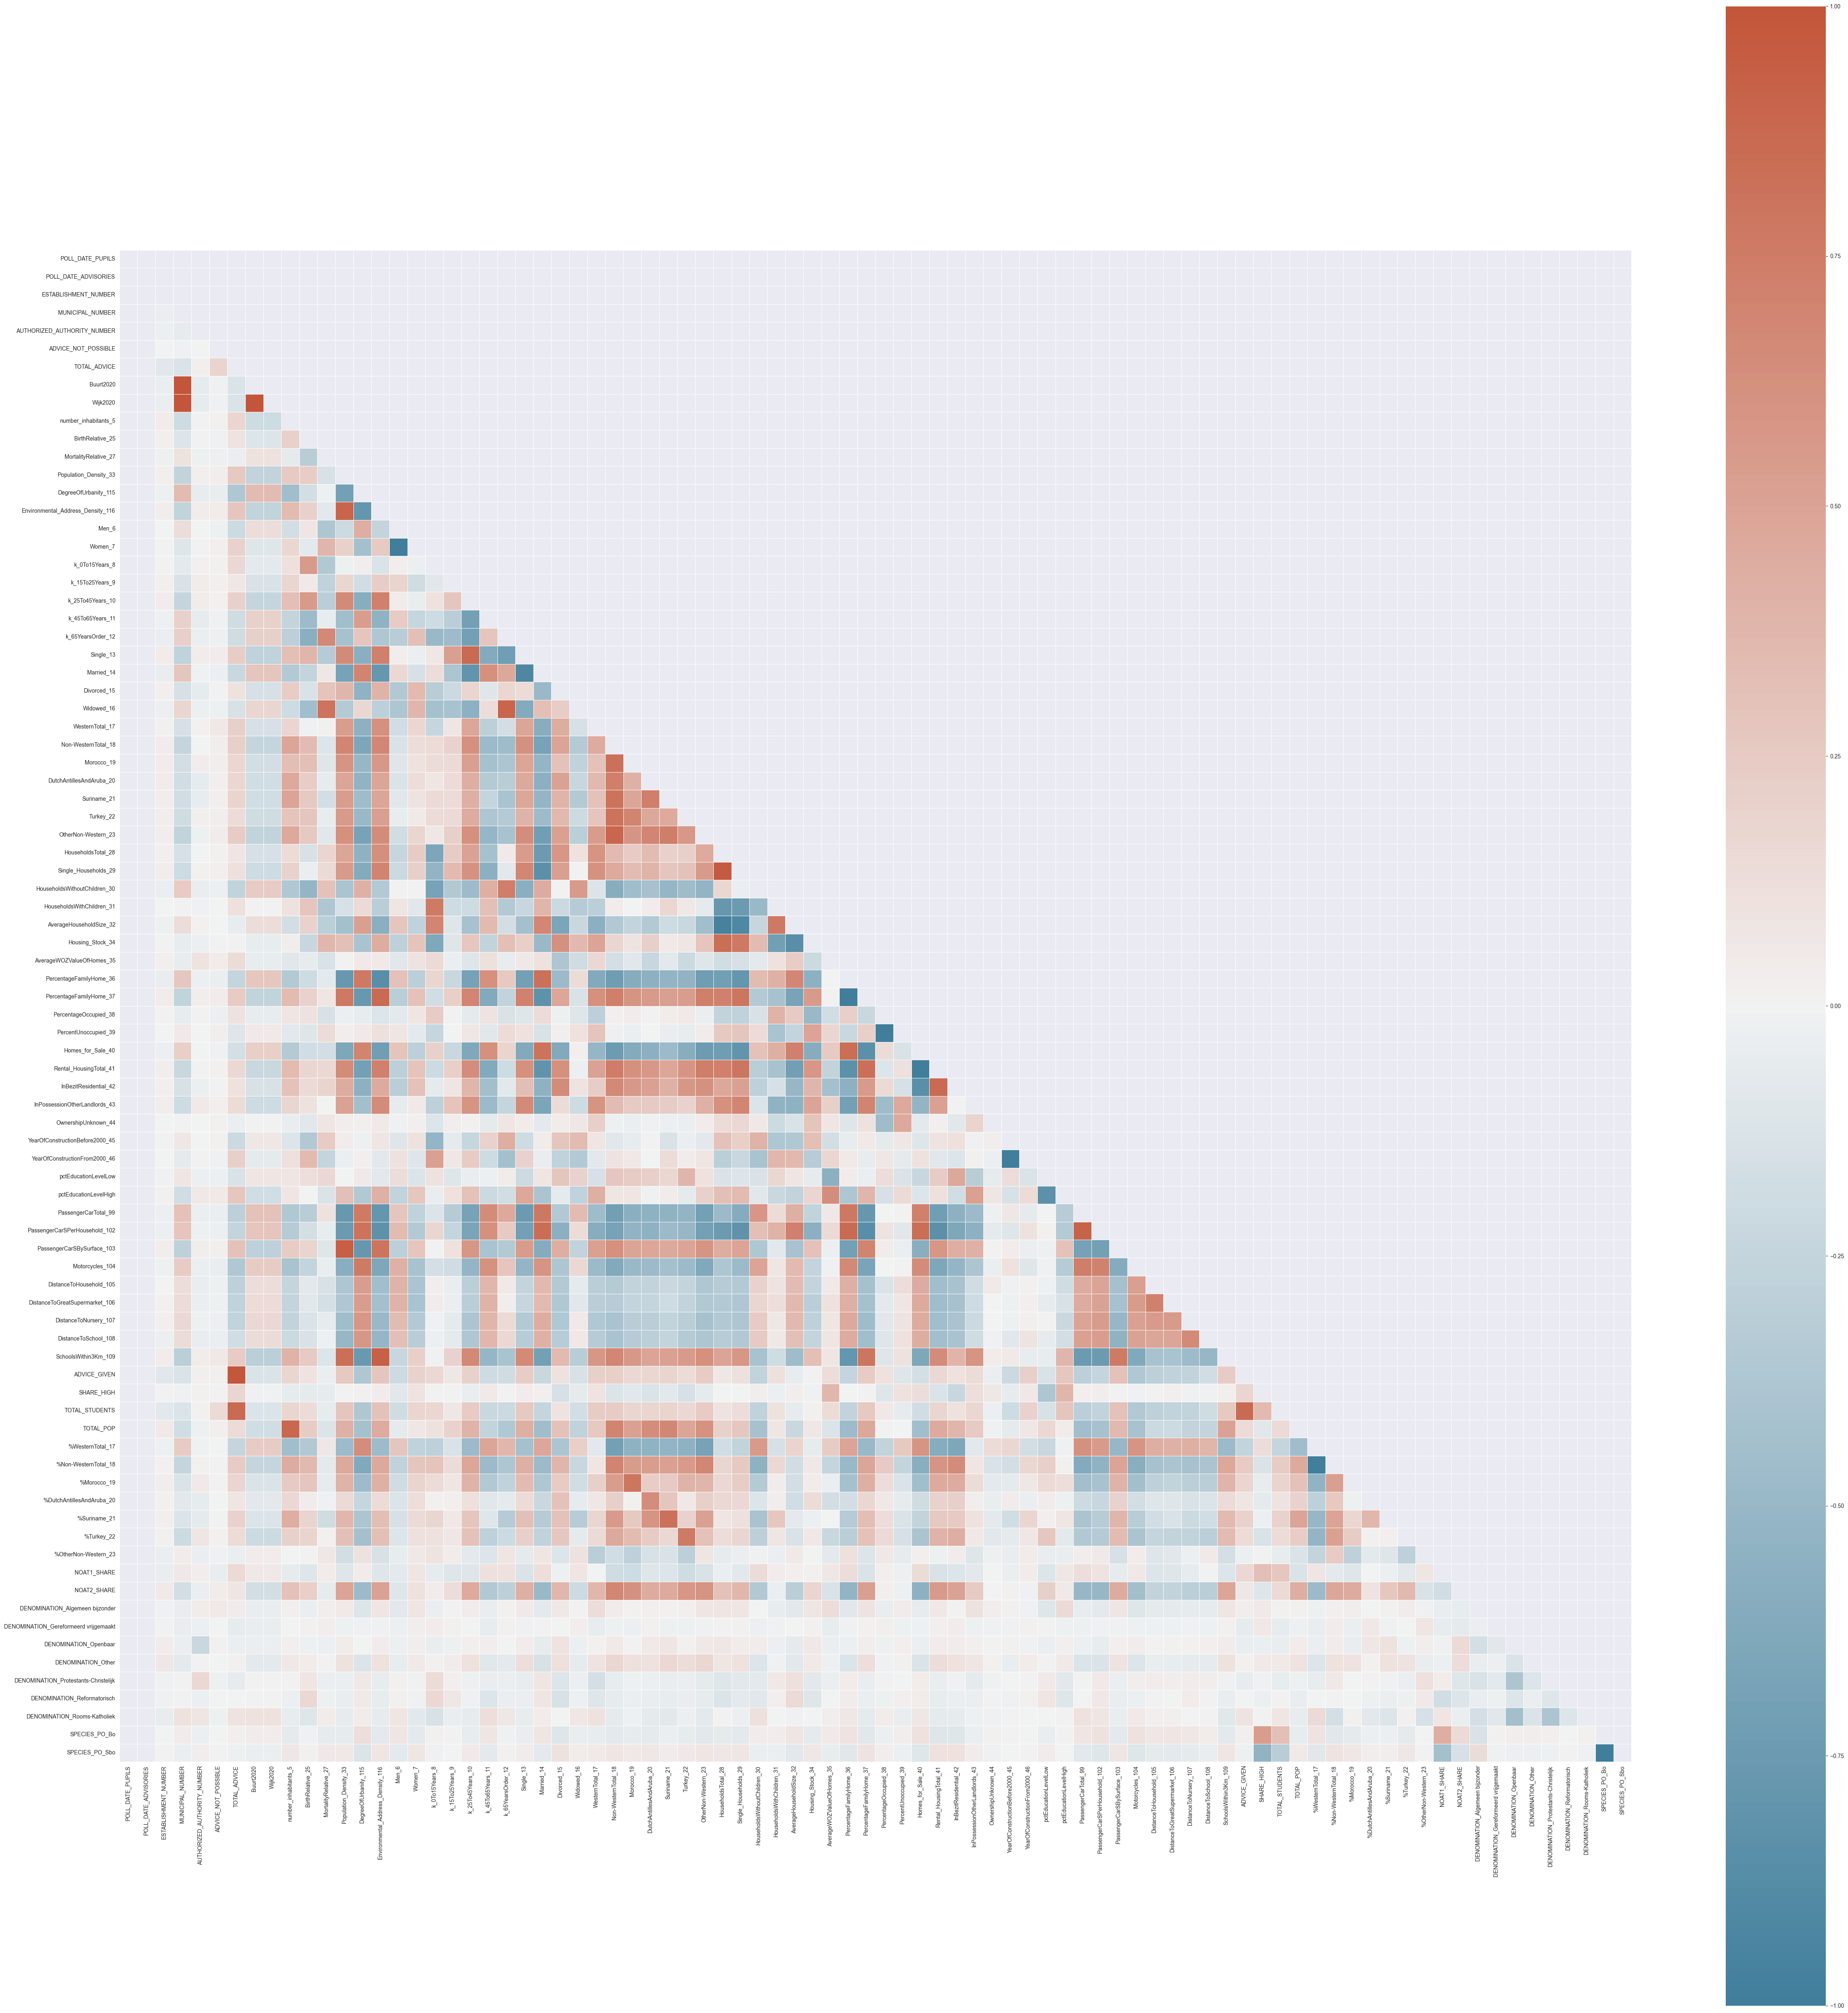

In [40]:
#We can use a heatmap to determine features that have highest correlation with SHARE_HIGH.
# heatmap of correlations
# Create plot
fig, axes = plt.subplots(figsize=(50, 50))
fig.set_tight_layout(True)

# Compute correlation matrix
corr = school_encoded_df.corr()

# Create upper triangular matrix to mask the upper triangular part of the heatmap
corr_mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap (because it looks better)
corr_cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask = corr_mask, cmap=corr_cmap, annot=False,square = True, linewidths=.5, ax = axes)

plt.savefig("data/heatmap.png")
plt.show()

In [45]:
#Here we select features with highest correlation -> sorted descendingly

#We take absolute correlation and sort by share_high
df_corr = corr[['SHARE_HIGH']].abs().sort_values(by=['SHARE_HIGH'],ascending=False).T
df_corr.head()

,SHARE_HIGH,SPECIES_PO_Bo,SPECIES_PO_Sbo,pctEducationLevelHigh,pctEducationLevelLow,AverageWOZValueOfHomes_35,TOTAL_STUDENTS,NOAT1_SHARE,InBezitResidential_42,ADVICE_GIVEN,TOTAL_ADVICE,Turkey_22,Divorced_15,%Turkey_22,%Non-WesternTotal_18,%WesternTotal_17,DutchAntillesAndAruba_20,Rental_HousingTotal_41,Homes_for_Sale_40,InPossessionOtherLandlords_43,Non-WesternTotal_18,PercentageOccupied_38,PercentUnoccupied_39,NOAT2_SHARE,WesternTotal_17,TOTAL_POP,Morocco_19,Women_7,Men_6,Suriname_21,BirthRelative_25,Widowed_16,%DutchAntillesAndAruba_20,OtherNon-Western_23,OwnershipUnknown_44,MortalityRelative_27,number_inhabitants_5,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,DENOMINATION_Gereformeerd vrijgemaakt,DENOMINATION_Other,%Morocco_19,k_45To65Years_11,DENOMINATION_Algemeen bijzonder,k_25To45Years_10,DENOMINATION_Openbaar,Single_13,Environmental_Address_Density_116,PassengerCarSPerHousehold_102,%Suriname_21,HouseholdsWithoutChildren_30,DENOMINATION_Reformatorisch,AverageHouseholdSize_32,HouseholdsWithChildren_31,Married_14,SchoolsWithin3Km_109,DistanceToGreatSupermarket_106,PassengerCarTotal_99,Housing_Stock_34,Motorcycles_104,DENOMINATION_Protestants-Christelijk,AUTHORIZED_AUTHORITY_NUMBER,DistanceToSchool_108,Buurt2020,Wijk2020,MUNICIPAL_NUMBER,DistanceToNursery_107,DegreeOfUrbanity_115,ADVICE_NOT_POSSIBLE,k_0To15Years_8,Population_Density_33,k_65YearsOrder_12,PercentageFamilyHome_36,PercentageFamilyHome_37,ESTABLISHMENT_NUMBER,DistanceToHousehold_105,Single_Households_29,HouseholdsTotal_28,%OtherNon-Western_23,PassengerCarSBySurface_103,k_15To25Years_9,DENOMINATION_Rooms-Katholiek,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES
SHARE_HIGH,1.0,0.538039,0.538039,0.379271,0.377822,0.369423,0.351574,0.31774,0.22764,0.185947,0.183757,0.154223,0.148547,0.138744,0.132371,0.132015,0.131235,0.130958,0.127415,0.121773,0.120508,0.100134,0.100134,0.099982,0.091718,0.091212,0.089021,0.087327,0.087239,0.083486,0.070125,0.069755,0.065594,0.065405,0.06455,0.062091,0.0597,0.05584,0.055839,0.055745,0.051493,0.050155,0.04966,0.047361,0.040634,0.038398,0.038337,0.032241,0.029994,0.028273,0.027069,0.025788,0.02578,0.024076,0.022243,0.020459,0.019554,0.019244,0.014929,0.013852,0.013665,0.013187,0.011686,0.010451,0.010451,0.01045,0.009503,0.009369,0.006885,0.006507,0.0057,0.005099,0.005094,0.005094,0.004632,0.004475,0.003208,0.002657,0.002618,0.001345,0.001118,0.000687,NaN,NaN


In [47]:

features = list(df_corr.columns)[1:31]
print(f"30 Features with the highest absolute correlation with SHARE_HIGH {features}")

30 Features with the highest absolute correlation with SHARE_HIGH ['SPECIES_PO_Bo', 'SPECIES_PO_Sbo', 'pctEducationLevelHigh', 'pctEducationLevelLow', 'AverageWOZValueOfHomes_35', 'TOTAL_STUDENTS', 'NOAT1_SHARE', 'InBezitResidential_42', 'ADVICE_GIVEN', 'TOTAL_ADVICE', 'Turkey_22', 'Divorced_15', '%Turkey_22', '%Non-WesternTotal_18', '%WesternTotal_17', 'DutchAntillesAndAruba_20', 'Rental_HousingTotal_41', 'Homes_for_Sale_40', 'InPossessionOtherLandlords_43', 'Non-WesternTotal_18', 'PercentageOccupied_38', 'PercentUnoccupied_39', 'NOAT2_SHARE', 'WesternTotal_17', 'TOTAL_POP', 'Morocco_19', 'Women_7', 'Men_6', 'Suriname_21', 'BirthRelative_25']


Now we can create the train and test data sets, which we will use to train our ML models.

#### 2.3 Scale the data using sklearn's StandardScaler

In [53]:
#Features
X_unscaled = school_encoded_df[features]

#fit scaler
scaler = StandardScaler()
scaler.fit(X_unscaled)
X = scaler.transform(X_unscaled)

#Target
y = school_encoded_df['SHARE_HIGH']

print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {y.shape}")

Shape of X: (6293, 30)
Shape of Y: (6293,)


#### 2.4 Split the sample into a train and a test sets.

In [56]:
#Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

### **3. Training machine learning models**<br>

To compare different models, we provide you with a custom evaluation function that allows us to swiftly report the following stats for the train and test data:
* mean square error
* mean absolute error
* R2

In [55]:
def eval_regression_perf(model, X_train, X_test, Y_train, Y_test):
    
    # Make prediction with the trained model
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    # Create a function that computes the MSE, MAE, and R2
    def perfs(Y,Y_pred):
        mse = mean_squared_error(Y,Y_pred)
        mae = mean_absolute_error(Y,Y_pred)
        R2 = r2_score(Y,Y_pred)
        return mse,mae,R2

    # Apply the perfs function to the train and test data sets
    mse_train, mae_train, r2_train = perfs(Y_train,Y_pred_train)
    mse_test,  mae_test , r2_test  = perfs(Y_test,Y_pred_test)
        
    # Print results
    print('Performance')
    print(f'Mean Squared  Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
    print(f'Mean Absolute Error Train | Test: \t{mae_train:>7.4f}\t|  {mae_test:>7.4f}')
    print(f'R2                  Train | Test: \t{ r2_train:>7.4f}\t|  {r2_test:>7.4f}\n')

#### 3.1 Random forest:
- Set the number of trees to 250
-  Use the following hyperparameters: 
    - max_depth = 9
    - max_features = 0.5
    - max_leaf_nodes = 30
    - min_samples_leaf = 50
- Print the performance of the random forest
- Visualise the importance of each feature on a barplot.

In [57]:
#Using random forest as classifier
random_forest = RandomForestRegressor(n_estimators=250, max_depth=9, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=50)

#Fit classifier
random_forest.fit(X_train, y_train)

#Print scores
eval_regression_perf(random_forest, X_train, X_test, y_train, y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0191	|   0.0205
Mean Absolute Error Train | Test: 	 0.1074	|   0.1112
R2                  Train | Test: 	 0.5363	|   0.5170



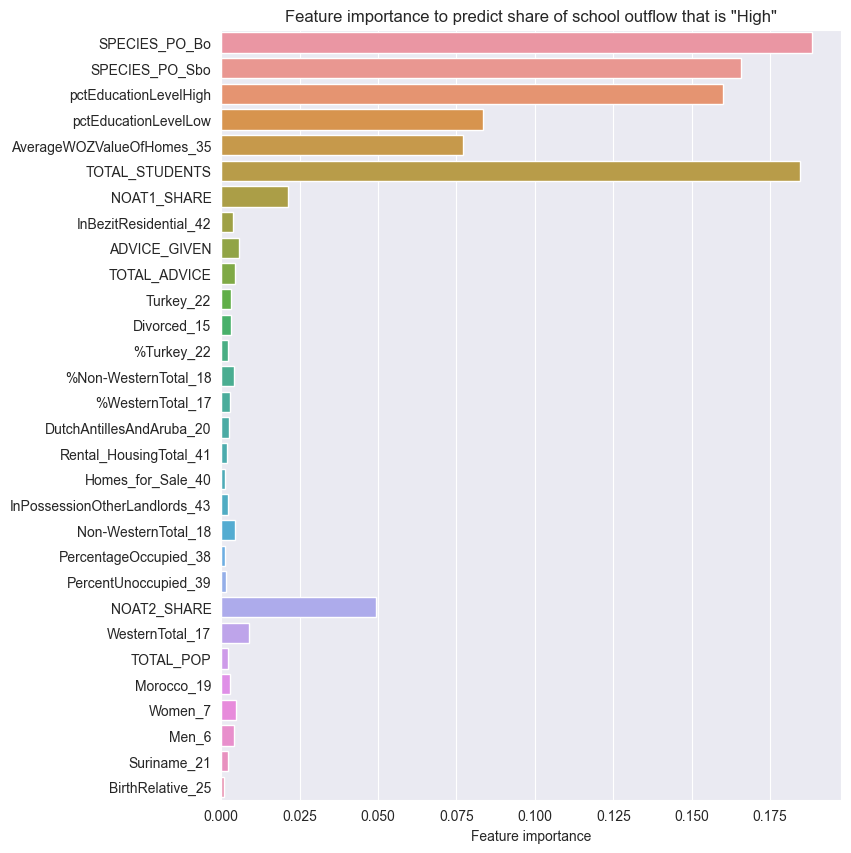

In [62]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(8,10))
sns.barplot(y=features, x=random_forest.feature_importances_, ax = ax).set(title='Feature importance to predict share of school outflow that is "High"')
ax.set_xlabel('Feature importance')

# Show plot
plt.show()

#### Interpretation of results
Overall, the model performs quite decently; It does not seem to overfit and obtains similar metric scores on the test set in comparison to the train set. When looking at the most important features it seems that `SPECIES_PO, `EducationLevel` and `TotalStudents` have the most impact on the `SHARE_HIGH` feature.

#### 3.2 MLP
- Set the batch size to 250, and max_iter to 2000
- Perform a grid search on the following hyperparameters: 
    - hidden_layer_sizes, values: (20,20),(30,30),(25,25)
    - alpha, values: 5,1,0.1
    - learning_rate_init: 0.01,0.001,0.0001
- Perform the MLP regression with the tuned hyperparameters
- Print the performance of the MLP

In [67]:
# Create RF object
mlp_gs = MLPRegressor()

# Define the hyperparameter search space
hyperparameter_space = {
    'hidden_layer_sizes': [(20,20),(30,30),(25,25)],
    'alpha': [5, 1, 0.1],
    'learning_rate_init': [0.01, 0.001, 0.0001]
}

# Create scoring function
scorer = make_scorer(mean_squared_error, greater_is_better = False)

# Create the grid_search object, with using the mlp_gs classifier
folds = 5 # Number of cross validation splits
mlp_gs_gridsearch = GridSearchCV(mlp_gs, hyperparameter_space, n_jobs=-1, cv=folds, scoring=scorer, return_train_score=True)

#Fit mlp_gs on train set
mlp_gs_gridsearch.fit(X_train, y_train)
print(f'Optimal hyperparameters:\n{mlp_gs_gridsearch.best_params_}')
print(f'Mean Squared Error:\t{(-mlp_gs_gridsearch.best_score_):0.3f}')

Optimal hyperparameters:
{'alpha': 1, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.001}
Mean Squared Error:	0.021


In [70]:
#MLP Regression with the tuned params
mlp = MLPRegressor(alpha=1, hidden_layer_sizes=(20,20), learning_rate_init=0.001)

#Fit model
mlp.fit(X_train, y_train)

#Print scores
eval_regression_perf(mlp, X_train, X_test, y_train, y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0203	|   0.0205
Mean Absolute Error Train | Test: 	 0.1112	|   0.1108
R2                  Train | Test: 	 0.5072	|   0.5177



#### Interpretation of results
This model seems to perform quite well overall, it shows similar results to the Random Forest and it does not overfit.

#### 3.3 Gradient boosting
- Use the following hyperparameters:
    - max_depth = 6
    - max_features = 0.5
    - max_leaf_nodes = 30
    - min_samples_leaf = 50
    - learning_rate = 0.003
- Print the performance of the Gradient boosting regression

In [72]:
#Instantiate model
gb = GradientBoostingRegressor(max_depth=6, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=50, learning_rate=0.003)

#Fit model
gb.fit(X_train, y_train)

#Print scores
eval_regression_perf(gb, X_train, X_test, y_train, y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0317	|   0.0329
Mean Absolute Error Train | Test: 	 0.1412	|   0.1446
R2                  Train | Test: 	 0.2284	|   0.2255



#### Interpretation of results
When comparing this model to the previous MLP and Random Forest model, it seems to perform worse having an higher MSE and MAE and also obtains a lower R2 score indicating a worse regression. It does not seem to overfit since the metric values on the test set are similar to the training set.

#### 3.4 Ensemble model
- Create 3 ensemble models from the 3 models with the tuned hyperparameters for each model
- model 1: Random forest, MLP
- model 2: Random forest, GBR
- model 3: MLP, GBR<br>

Print the performance of each ensemble model

In [73]:
#For this we can make use of the VotingRegressor method in sklearn.
#It averages the individual prediction of the models to make a final prediction.

#First model
model_1 = VotingRegressor([('rf', random_forest), ('mlp', mlp)])

#Fit ensemble objects
model_1.fit(X_train, y_train)

#Evaluate results
print('Results of model_1:')
eval_regression_perf(model_1, X_train, X_test, y_train, y_test)

Results of model_1:
Performance
Mean Squared  Error Train | Test: 	 0.0195	|   0.0204
Mean Absolute Error Train | Test: 	 0.1090	|   0.1106
R2                  Train | Test: 	 0.5254	|   0.5212



In [75]:
#Second model
model_2 = VotingRegressor([('rf', random_forest), ('gbr', gb)])

#Fit ensemble objects
model_2.fit(X_train, y_train)

#Evaluate results
print('Results of model_2:')
eval_regression_perf(model_2, X_train, X_test, y_train, y_test)

Results of model_2:
Performance
Mean Squared  Error Train | Test: 	 0.0228	|   0.0239
Mean Absolute Error Train | Test: 	 0.1215	|   0.1248
R2                  Train | Test: 	 0.4454	|   0.4370



In [76]:
#Third model
model_3 = VotingRegressor([('mlp', mlp), ('gbr',gb)])

#Fit ensemble objects
model_3.fit(X_train, y_train)

#Evaluate results
print('Results of model_3:')
eval_regression_perf(model_3, X_train, X_test, y_train, y_test)

Results of model_3:
Performance
Mean Squared  Error Train | Test: 	 0.0233	|   0.0239
Mean Absolute Error Train | Test: 	 0.1229	|   0.1246
R2                  Train | Test: 	 0.4329	|   0.4392



#### Interpretation of results
In general, model_1 (MLP + Random Forest) seems to perform the best having the lowest MSE and MAE and obtaining the highest R2 score. Model 2 and 3 include the Gradient Boosting model which individually already performed worse than the other two models, so having an ensamble model including the Gradient Boost regressor will perform worse which is what we can observe here.

### **4. Substantive results**

#### 4.1 Predict the expected share of school leaver with an advice for higher eduction using the model with the best generalisation performance.

The model with the best generalisation performance is the model with the best performance on the test set. When looking at the results of all the different models, we can observe that the Multilayer Perceptron model and the Random Forest model perform the best overall. When combining these models in an ensemble model it gives the best results with the lowest MSE, MAE and the highest R2 scores. So model_1 is used.

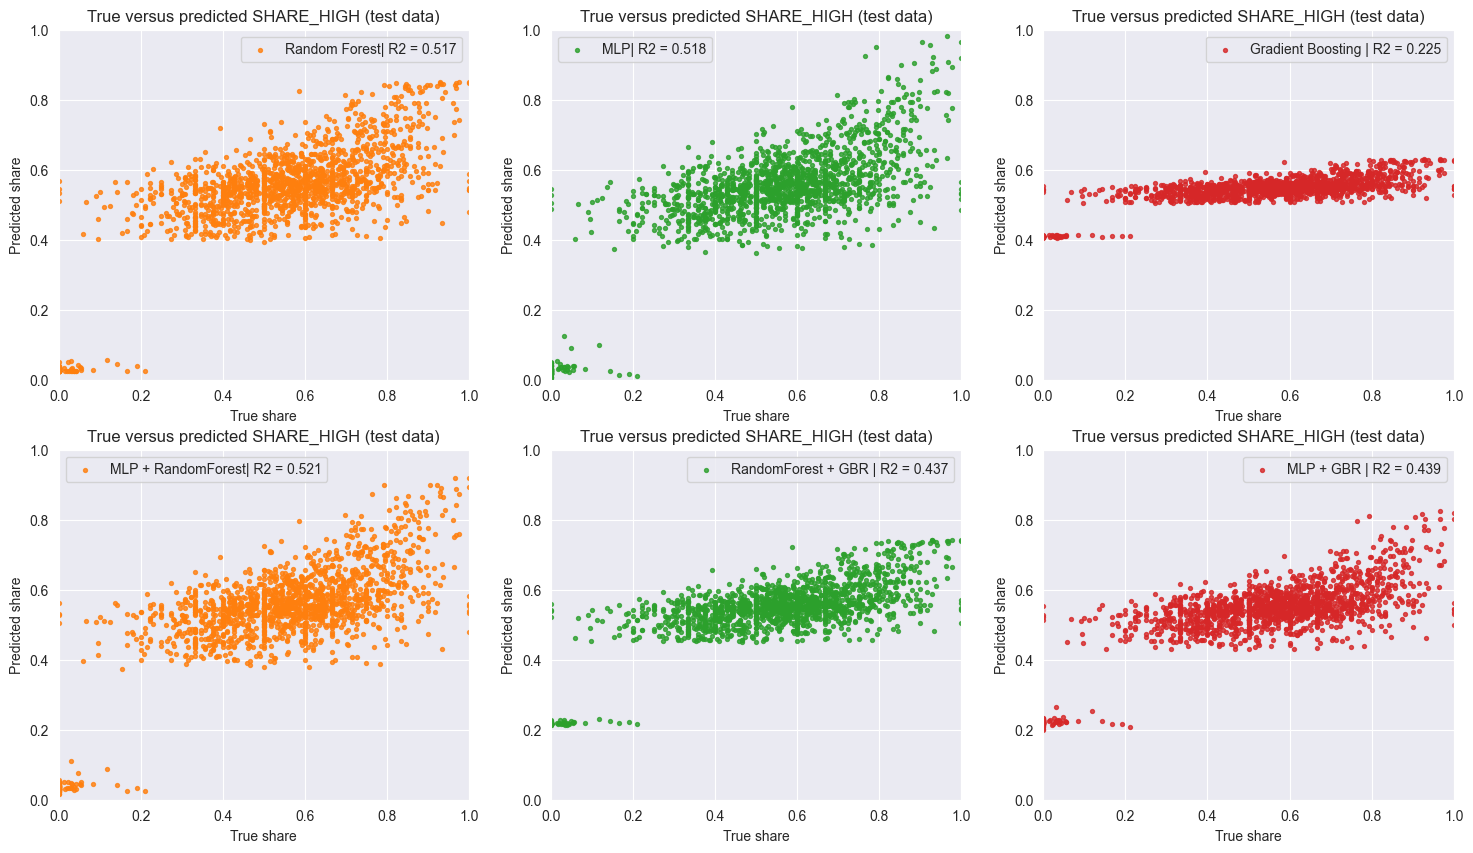

In [84]:
#We want to predict SHARE_HIGH on test set using the best model: model_1

fig, ax = plt.subplots(2,3,figsize=(18,10))
ax[0][0].scatter(x = Y_test, y = random_forest.predict(X_test), s = 8, alpha = 0.8, c = '#ff7f0e', label = f'Random Forest| R2 = {random_forest.score(X_test,Y_test):0.3f}')
ax[0][1].scatter(x = Y_test, y = mlp.predict(X_test),   s = 8, alpha = 0.8, c = '#2ca02c', label = f'MLP| R2 = {mlp.score(X_test,Y_test):0.3f}')
ax[0][2].scatter(x = Y_test, y = gb.predict(X_test),   s = 8, alpha = 0.8, c = '#d62728', label = f'Gradient Boosting | R2 = {gb.score(X_test,Y_test):0.3f}')
ax[1][0].scatter(x = Y_test, y = model_1.predict(X_test), s = 8, alpha = 0.8, c = '#ff7f0e', label = f'MLP + RandomForest| R2 = {model_1.score(X_test,Y_test):0.3f}')
ax[1][1].scatter(x = Y_test, y = model_2.predict(X_test),   s = 8, alpha = 0.8, c = '#2ca02c', label = f'RandomForest + GBR | R2 = {model_2.score(X_test,Y_test):0.3f}')
ax[1][2].scatter(x = Y_test, y = model_3.predict(X_test),   s = 8, alpha = 0.8, c = '#d62728', label = f'MLP + GBR | R2 = {model_3.score(X_test,Y_test):0.3f}')

# Add labels, legend, and title to each plot
for x in range(0,2):
    for n in range(0,3,1):
        ax[x][n].set_xlabel('True share')
        ax[x][n].set_ylabel('Predicted share')
        ax[x][n].set_xlim(0,1)
        ax[x][n].set_ylim(0,1)
        ax[x][n].legend()
        ax[x][n].set_title('True versus predicted SHARE_HIGH (test data)')

plt.show()

So we will use the predictions of model_1 (Random Forest + MLP), since it has the best generalisation performance.

In [119]:
#So we will use model_1
predictions = model_1.predict(X_test)
true = y_test

#Dataframe index is preserved due to `true` being a series :)
pred_df = pd.DataFrame({"Predicted" : predictions, "True" : true})
pred_df.tail(10)

,Predicted,True
2186,0.664185,0.552632
2115,0.533009,0.588235
501,0.625838,0.705882
4312,0.595604,0.692308
1071,0.562217,0.682927
6135,0.703121,0.727273
4126,0.553026,0.600000
347,0.526213,0.357143
2340,0.497098,0.371429
483,0.623079,0.842105


#### 4.2 Compute the difference between the expected SHARE_HIGH and the actual SHARE_HIGH. Which 10 schools would you recommend the ministry of education to assess in-depth with priority?

In [120]:
#Calculate the difference between true SHARE_HIGH and predicted SHARE_HIGH
pred_df['Difference'] = pred_df['Predicted'] - pred_df['True']

#Inner join of predicted schools
pred_schools_df = pd.merge(left=school_df, right=pred_df, left_index=True, right_index=True)

#Assert that True SHARE_HIGH is properly merged
assert pred_schools_df['SHARE_HIGH'].equals(pred_schools_df['True'])
print(f"Predicted schools: {len(pred_schools_df)}")

pred_schools_df.head()

Predicted schools: 1574


,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,SPECIES_PO,DENOMINATION,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,NOAT1_SHARE,NOAT2_SHARE,Predicted,True,Difference
0,00AP-0,20201001,20210729,00AP,0,Wereldwijs,2716PH,ZOETERMEER,637,Zoetermeer,Zuid-Holland,41646,Bo,Gereformeerd vrijgemaakt,0,20,6370100.0,63701.0,Meerzicht-West,Meerzicht,15410.0,10.0,9.0,6738.0,1.0,2977.0,0.481506,0.518494,0.175535,0.114536,0.245944,0.246918,0.217391,0.493835,0.339714,0.118105,0.048670,0.118105,0.267034,0.022713,0.032446,0.066840,0.011681,0.133030,0.471123,0.184296,0.118754,0.168397,2.1,0.472680,194.0,37.0,63.0,98.0,2.0,45.0,55.0,50.0,5.0,0.0,98.0,2.0,0.320789,0.233871,0.393900,0.8,2654.0,0.026606,1.0,0.9,0.5,0.6,12.4,"POLYGON ((92150.00039999932 453177.4882999994,...",20,0.650000,103.0,10045.0,0.181185,0.409657,0.034843,0.049776,0.102539,0.017919,0.204082,0.825243,0.174757,0.498031,0.650000,-0.151969
3,00AZ-0,20201001,20210729,00AZ,0,De Stapsteen,2971AR,BLESKENSGRAAF CA,1978,Molenlanden,Zuid-Holland,41638,Bo,Openbaar,0,16,19780203.0,197802.0,Bleskensgraaf-Dorp,Wijk02-Bleskensgraaf ca,2870.0,8.0,12.0,235.0,5.0,287.0,0.503484,0.496516,0.217770,0.148084,0.207317,0.240418,0.188153,0.458188,0.440767,0.036585,0.060976,0.034843,0.034843,0.000000,0.003484,0.001742,0.001742,0.026132,0.343206,0.083624,0.097561,0.158537,2.8,0.372125,298.0,86.0,14.0,95.0,5.0,67.0,28.0,22.0,6.0,5.0,75.0,25.0,0.291457,0.201005,0.473868,1.4,111.0,0.041812,0.7,0.8,0.8,0.6,2.6,POLYGON ((113452.31069999933 432144.5777999982...,16,0.687500,91.0,295.0,0.338983,0.338983,0.000000,0.033898,0.016949,0.016949,0.254237,0.857143,0.142857,0.520669,0.687500,-0.166831
4,00BB-0,20201001,20210729,00BB,0,Obs Letterwies,9944AR,NIEUWOLDA,1895,Oldambt,Groningen,41613,Bo,Openbaar,0,11,18951000.0,189510.0,Nieuwolda,Wijk 04 Nieuwolda,1350.0,7.0,16.0,50.0,5.0,112.0,0.525926,0.477778,0.137037,0.096296,0.181481,0.325926,0.266667,0.392593,0.429630,0.103704,0.070370,0.062963,0.014815,0.000000,0.003704,0.003704,0.000000,0.011111,0.462963,0.148148,0.181481,0.133333,2.1,0.470370,165.0,95.0,5.0,94.0,6.0,69.0,31.0,23.0,8.0,0.0,89.0,11.0,0.349515,0.184466,0.588889,1.3,29.0,0.092593,5.1,1.0,1.0,1.1,0.9,POLYGON ((261406.79679999873 586150.3126000017...,11,0.363636,75.0,130.0,0.653846,0.153846,0.000000,0.038462,0.038462,0.000000,0.115385,0.986667,0.013333,0.458791,0.363636,0.095155
13,00DD-0,20201001,20210729,00DD,0,Basissch Het Startnest,1422LE,UITHOORN,451,Uithoorn,Noord-Holland,40581,Bo,Rooms-Katholiek,0,36,4513500.0,45135.0,Zijdelwaard,Wijk 35 Zijdelwaard,7070.0,11.0,17.0,5321.0,2.0,1

Next to the inpact of urban and school characteristics provided by the dataset, the school performance has an inpact on the `SHARE_HIGH` variable and might explain the difference between predicted and true `SHARE_HIGH`. The ministry is only able to investigate 10 schools, and it expects that all schools meet certain performance criteria. Therefore it is interested in investigating schools that are underperforming, so we are the most interested in schools that have the highest difference between predicted `SHARE_HIGH` and true `SHARE_HIGH`. Because if the expected share is much higher than the observed share, the school might not perform well. The 10 schools can be seen below in the dataframe, the most underperforming school has 0% advice for higher education while the best model predicts it to be around 56%. Then it seems that this school is highly underperforming.


In [121]:
#We take 10 schools with largest difference
pred_schools_df.nlargest(n = 10, columns='Difference')

,SCHOOL_ID,POLL_DATE_PUPILS,POLL_DATE_ADVISORIES,BRIN_NUMBER,ESTABLISHMENT_NUMBER,INSTITUTION_NAME_BRANCH,ZIPCODE_ESTABLISHMENT,LOCALITY_NAME,MUNICIPAL_NUMBER,MUNICIPAL_NAME,PROVINCE,AUTHORIZED_AUTHORITY_NUMBER,SPECIES_PO,DENOMINATION,ADVICE_NOT_POSSIBLE,TOTAL_ADVICE,Buurt2020,Wijk2020,Buurtnaam2020,Wijknaam2020,number_inhabitants_5,BirthRelative_25,MortalityRelative_27,Population_Density_33,DegreeOfUrbanity_115,Environmental_Address_Density_116,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,k_25To45Years_10,k_45To65Years_11,k_65YearsOrder_12,Single_13,Married_14,Divorced_15,Widowed_16,WesternTotal_17,Non-WesternTotal_18,Morocco_19,DutchAntillesAndAruba_20,Suriname_21,Turkey_22,OtherNon-Western_23,HouseholdsTotal_28,Single_Households_29,HouseholdsWithoutChildren_30,HouseholdsWithChildren_31,AverageHouseholdSize_32,Housing_Stock_34,AverageWOZValueOfHomes_35,PercentageFamilyHome_36,PercentageFamilyHome_37,PercentageOccupied_38,PercentUnoccupied_39,Homes_for_Sale_40,Rental_HousingTotal_41,InBezitResidential_42,InPossessionOtherLandlords_43,OwnershipUnknown_44,YearOfConstructionBefore2000_45,YearOfConstructionFrom2000_46,pctEducationLevelLow,pctEducationLevelHigh,PassengerCarTotal_99,PassengerCarSPerHousehold_102,PassengerCarSBySurface_103,Motorcycles_104,DistanceToHousehold_105,DistanceToGreatSupermarket_106,DistanceToNursery_107,DistanceToSchool_108,SchoolsWithin3Km_109,geometry,ADVICE_GIVEN,SHARE_HIGH,TOTAL_STUDENTS,TOTAL_POP,%WesternTotal_17,%Non-WesternTotal_18,%Morocco_19,%DutchAntillesAndAruba_20,%Suriname_21,%Turkey_22,%OtherNon-Western_23,NOAT1_SHARE,NOAT2_SHARE,Predicted,True,Difference
4835,17RD-0,20201001,20210729,17RD,0,OBS Rietendak,7335DC,APELDOORN,200,Apeldoorn,Gelderland,41616,Bo,Openbaar,0,15,2000304.0,20003.0,Westenenk,Zuidwest,15040.0,9.0,10.0,2002.0,2.0,1558.0,0.500665,0.499335,0.150266,0.106051,0.216090,0.297540,0.229388,0.420878,0.454787,0.071476,0.052194,0.069814,0.084109,0.003657,0.004322,0.003657,0.017952,0.053856,0.432513,0.135306,0.152261,0.144614,2.2,0.429189,282.0,82.0,18.0,97.0,3.0,70.0,30.0,22.0,7.0,0.0,88.0,12.0,0.275109,0.292576,0.523936,1.2,1049.0,0.052194,0.9,0.7,0.5,0.5,14.1,POLYGON ((194112.21680000052 468107.4670000002...,15,0.000000,127.0,3570.0,0.294118,0.354342,0.015406,0.018207,0.015406,0.075630,0.226891,0.874016,0.125984,0.562446,0.000000,0.562446
4367,15XA-0,20201001,20210729,15XA,0,a.z.s. De Wissel,8315PS,LUTTELGEEST,171,Noordoostpolder,Flevoland,40662,Bo,Openbaar,14,16,1710322.0,17103.0,Luttelgeest-woonkern,Wijk 03 Luttelgeest,2255.0,15.0,2.0,59.0,5.0,96.0,0.565410,0.434590,0.201774,0.115299,0.343681,0.241685,0.093126,0.549889,0.381375,0.044346,0.022173,0.082040,0.301552,0.004435,0.000000,0.000000,0.026608,0.266075,0.279379,0.064302,0.097561,0.113082,2.5,0.421286,210.0,82.0,18.0,65.0,35.0,53.0,47.0,10.0,37.0,0.0,57.0,43.0,0.317919,0.213873,0.427938,1.5,25.0,0.039911,4.3,4.0,1.8,0.9,1.0,POLYGON ((186431.54289999977 528901.4241000004...,2,0.000000,165.0,1535.0,0.120521,0.442997,0.006515,0.000000,0.000000,0.039088,0.390879,0.951515,0.048485,0.529479,0.000000,0.529479
2655,10CJ-0,20201001,20210729,10CJ,0,De Ontdekking,8072GZ,NUNSPEET,302,Nunspeet,Gelderland,41345,Bo,Openbaar,0,5,3020000.0,30200.0,Nunspeet-Oost,Wijk 00 Nunspeet,22470.0,12.0,13.0,386.0,4.0,909.0,0.493102,0.506676,0.176457,0.121273,0.224522,0.266355,0.211838,0.414775,0.468847,0.061638,0.054295,0.040498,0.041611,0.003338,0.001335,0.002003,0.002893,0.032265,0.404094,0.119938,0.130174,0.153538,2.4,0.403605,287.0,82.0,18.0,97.0,3.0,63.0,36.0,27.0,9.0,1.0,82.0,18.0,0.331707,0.226220,0.501780,1.2,194.0,0.041166,1.2,1.1,0.8,0.7,7.2,POLYGON ((183078.79679999873 489546.0001000017...,5,0.000000,67.0,2785.0,0.326750,0.335727,0.026930,0.010772,0.016158,0.023339,0.260323,0.895522,0.104478,0.526648,0.000000,0.526648
2387,09GN-0,20201001,20210729,09GN,0,Basissch De Pannebakker,3244AA,NIEUWE-TONGE,1924,Goeree-Overflakkee,Zuid-Holland,41502,Bo,Openbaar,0,7,19241101.0,192411.0,Nieuwe-Tonge woonkern,Nieuwe-Tonge,2420.0,10.0,9.0,171.0,5.0,256.0,0

In [ ]:
#It would be nice to also spatial plot the `Difference` variable as column with a colormap to see if underperforming schools are close together inregion. Unfortunately the schools_data.csv is not a GeoDataFrame even though it does seem to provide the geometry data.

# fig, ax = plt.subplots(figsize=(40,40))
# pred_schools_df.plot(ax =ax, column='Difference')

#### 4.3 Reflect on the meaningfulness and limitations of your analysis
One limitation is that we used were only to apply our model on 25% of unseen schools due to the 75/25 train test split. So we are currently missing 75% of analysis since these schools were used as training data. A possible solution to still predict `SHARE_HIGH` of all schools could be performed using k-fold cross validation. If we would use k == 4 (using the current split), then for every split we could predict schools in the test set(25% for each split), and then in the end combine results over all splits and return the 10 schools with the highest difference. Though, a problem with this approach would be that the model is retrained for every split, so we are not using just 1 model for all our predictions. Still I think the core concept is very useful since we can observe if a school is underperforming by looking at the difference between predicted `SHARE_HIGH` and true `SHARE_HIGH`.


### 5  **Extra funding for NOAT2 students**

#### 5.1 Explain why the question of the ministry regarding the adequacy of the current funding for NOAT2 **cannot** be answered using ML (or at least not the ML taught in this course), and the provided data. <br>

The ministry aims to find out if the current funding is enough for decreasing inpact of `NOAT2_SHARE` on `SHARE_HIGH`. When we look at the heatmap with the correlations between `SHARE_HIGH` and `NOAT1_SHARE` we observe a somewhat positive correlation in contrast to `SHARE_HIGH` and `NOAT2_SHARE` which have a negative correlation. This does not say much though since there are multiple factors also outside school performance such as urban characteristics that have an inpact on `SHARE_HIGH`. By providing funding the assumption is that school performance would increase which would increase `SHARE_HIGH` whilst `NOAT2_SHARE` stays the same, which would result in a less negative correlation to eventually make it equal.

This would not be feasible to answer due to the following reasons:
- We do not know for sure if more funding would even increase `SHARE_HIGH` (schools could use the funding in inefficient ways for example), and we currently don't have data of schools before the funding started / we dont have any financial data of schools. and how it would impact `SHARE_HIGH.
- Next to school performance which would maybe? improve with the funding, there are more factors such as Urban and School characteristics that impact `SHARE_HIGH`.

